In [1]:
using Printf
using Plots
using LinearAlgebra

In [2]:
include("CompactFDWave1D.jl")
import .CompactFDWave1D

In [3]:
function evolve!(fields, nt, outFreq, pars)
    time = [0.0]
    api = Animation()
    aphi = Animation()
    xrange = (fields.grid.x[1],fields.grid.x[end])
    yrange = (-7.0,7.0)
    
    y1 = similar(fields.grid.x)
    y2 = similar(y1)
    errpi = similar(y1)
    errphi = similar(y1)
    
    Piex = Animation()
    Phiex = Animation()
    
    nout = Int(round(nt/outFreq))
    terr = zeros(nout)
    Pierrl2 = zeros(nout)
    Phierrl2 = zeros(nout)
    
    jj=1

    screenOutFreq = outFreq
    @printf("Step=%d, time=%g, |Pi|=%g\n",0.0,time[1],CompactFDWave1D.l2norm(fields.u[1]))
    for i = 1:nt
        CompactFDWave1D.rk4_step!(CompactFDWave1D.waveEqs!, fields, time)
        if (mod(i,screenOutFreq)==0)
            @printf("Step=%d, time=%g, |Pi|=%g\n",i,time[1],CompactFDWave1D.l2norm(fields.u[1]))
        end
        if (mod(i,outFreq)==0)
            plt = plot(fields.grid.x, fields.u[1], xlim=xrange, ylim=yrange, label="Pi", color = :blue)
            plt = scatter!(fields.grid.x, fields.u[1], label=" ", color=:yellow)
            frame(api, plt)
            
            plt2 = plot(fields.grid.x, fields.u[2], xlim=xrange, ylim=yrange, label="Phi", color = :blue)
            plt2 = scatter!(fields.grid.x, fields.u[2], label=" ", color=:yellow)
            frame(aphi, plt2)
            
            exactsol!(y1,y2,fields.grid.x,time[1],pars)
            @. errpi = fields.u[1] - y1
            @. errphi = fields.u[2] - y2
            plt3 = plot(fields.grid.x, errpi, label="errPi", color = :blue, markershape=:circle)
            frame(Piex, plt3)
            
            terr[jj] = time[1]
            Pierrl2[jj] = CompactFDWave1D.l2norm(errpi)
            Phierrl2[jj] = CompactFDWave1D.l2norm(errphi)
            jj += 1
            
        end
    end

    return[api, aphi, Piex, terr, Pierrl2, Phierrl2]
end

evolve! (generic function with 1 method)

In [4]:
function exactsol!(Pi, Phi, x, t, pars)
    amp = pars["amp"]
    omega = pars["omega"]
    sigma = pars["sigma"]
    x0 = pars["x0"]
    p1 = pars["p1"]
    p2 = pars["p2"]
    
    @. Pi = -((amp*omega*p1*cos(omega*(-t + x)))/exp((-t + x - x0)^2/sigma^2)) + 
     -  (amp*omega*p2*cos(omega*(t + x)))/exp((t + x - x0)^2/sigma^2) + 
     -  (2*amp*p1*(-t + x - x0)*sin(omega*(-t + x)))/
     -   (exp((-t + x - x0)^2/sigma^2)*sigma^2) - 
     -  (2*amp*p2*(t + x - x0)*sin(omega*(t + x)))/
     -   (exp((t + x - x0)^2/sigma^2)*sigma^2)
    
    @. Phi = (amp*omega*p1*cos(omega*(-t + x)))/exp((-t + x - x0)^2/sigma^2) + 
     -  (amp*omega*p2*cos(omega*(t + x)))/exp((t + x - x0)^2/sigma^2) - 
     -  (2*amp*p1*(-t + x - x0)*sin(omega*(-t + x)))/
     -   (exp((-t + x - x0)^2/sigma^2)*sigma^2) - 
     -  (2*amp*p2*(t + x - x0)*sin(omega*(t + x)))/
     -   (exp((t + x - x0)^2/sigma^2)*sigma^2)
end

exactsol! (generic function with 1 method)

In [5]:
nx = 101
pars = Dict("amp" => 1.0, "omega" => 2.0*pi, "sigma" => 0.1, "x0" => 0.0, "p1" => 1.0, "p2" => 0.0, "xmin" => -1.0, "xmax" => 1.0 )

Dict{String, Float64} with 8 entries:
  "sigma" => 0.1
  "omega" => 6.28319
  "x0"    => 0.0
  "p2"    => 0.0
  "amp"   => 1.0
  "p1"    => 1.0
  "xmax"  => 1.0
  "xmin"  => -1.0

In [6]:
x = LinRange(pars["xmin"], pars["xmax"], nx)
Pi = zeros(nx)
Phi = zeros(nx)
exactsol!(Pi, Phi, x, 0.0, pars);

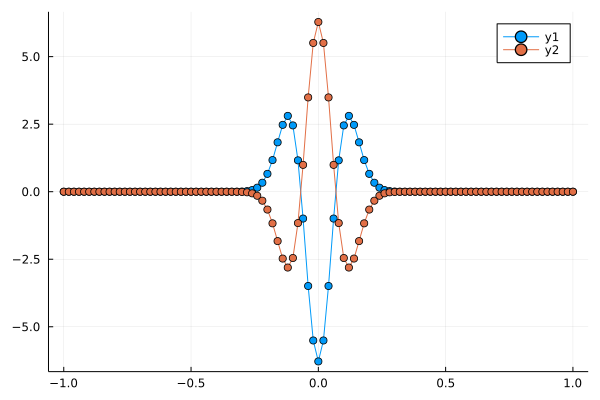

In [7]:
plot(x,[Pi,Phi],markershape=:circle)

In [8]:
cfl = 0.25
bbox = [pars["xmin"], pars["xmax"]]
grid = CompactFDWave1D.Grid(nx, bbox, cfl)

Main.CompactFDWave1D.Grid(-1.0, 1.0, 101, [-1.0, -0.98, -0.96, -0.94, -0.9199999999999999, -0.8999999999999999, -0.8799999999999999, -0.8599999999999999, -0.8400000000000001, -0.8200000000000001  …  0.8200000000000001, 0.8400000000000001, 0.8600000000000001, 0.8799999999999999, 0.8999999999999999, 0.9199999999999999, 0.94, 0.96, 0.98, 1.0], 0.02, 0.005)

In [9]:
order = 6
fields = CompactFDWave1D.GridFields(2, grid, order, 0)

Main.CompactFDWave1D.GridFields(2, Main.CompactFDWave1D.Grid(-1.0, 1.0, 101, [-1.0, -0.98, -0.96, -0.94, -0.9199999999999999, -0.8999999999999999, -0.8799999999999999, -0.8599999999999999, -0.8400000000000001, -0.8200000000000001  …  0.8200000000000001, 0.8400000000000001, 0.8600000000000001, 0.8799999999999999, 0.8999999999999999, 0.9199999999999999, 0.94, 0.96, 0.98, 1.0], 0.02, 0.005), [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0,

In [10]:
exactsol!(Pi, Phi, x, 0.0, pars)
fields.u[1] = Pi
fields.u[2] = Phi;

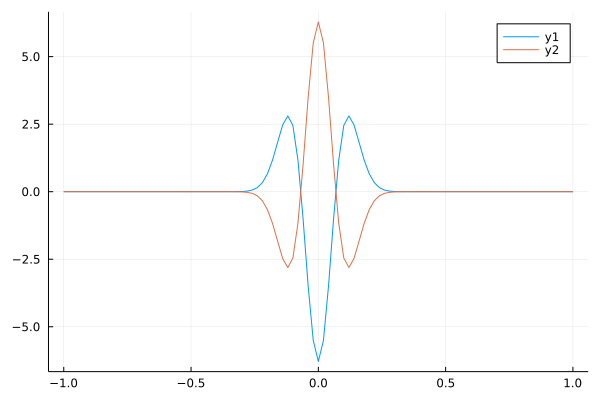

In [11]:
plot(grid.x,[fields.u[1],fields.u[2]])

In [12]:
nt = 1000
outFreq = 10
sol = evolve!(fields, nt, outFreq, pars)

Step=0, time=0, |Pi|=1.33433
Step=10, time=0.05, |Pi|=1.33433
Step=20, time=0.1, |Pi|=1.33433
Step=30, time=0.15, |Pi|=1.33433
Step=40, time=0.2, |Pi|=1.33433
Step=50, time=0.25, |Pi|=1.33433
Step=60, time=0.3, |Pi|=1.33433
Step=70, time=0.35, |Pi|=1.33433
Step=80, time=0.4, |Pi|=1.33433
Step=90, time=0.45, |Pi|=1.33433
Step=100, time=0.5, |Pi|=1.33432
Step=110, time=0.55, |Pi|=1.33432
Step=120, time=0.6, |Pi|=1.33432
Step=130, time=0.65, |Pi|=1.33432
Step=140, time=0.7, |Pi|=1.33432
Step=150, time=0.75, |Pi|=1.33432
Step=160, time=0.8, |Pi|=1.3338
Step=170, time=0.85, |Pi|=1.32179
Step=180, time=0.9, |Pi|=1.26127
Step=190, time=0.95, |Pi|=1.23383
Step=200, time=1, |Pi|=1.05129
Step=210, time=1.05, |Pi|=0.568565
Step=220, time=1.1, |Pi|=0.506358
Step=230, time=1.15, |Pi|=0.278357
Step=240, time=1.2, |Pi|=0.0745599
Step=250, time=1.25, |Pi|=0.0109012
Step=260, time=1.3, |Pi|=0.00100668
Step=270, time=1.35, |Pi|=0.0005312
Step=280, time=1.4, |Pi|=0.000528488
Step=290, time=1.45, |Pi|=0.0

6-element Vector{Any}:
 Animation("/var/folders/_4/gtn3165d1_b0xkbf0rgcm4h00000gr/T/jl_qnW9aY", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])
 Animation("/var/folders/_4/gtn3165d1_b0xkbf0rgcm4h00000gr/T/jl_mq7mjM", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])
 Animation("/var/folders/_4/gtn3165d1_b0xkbf0rgcm4h00000gr/T/jl_LojDJl", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "0

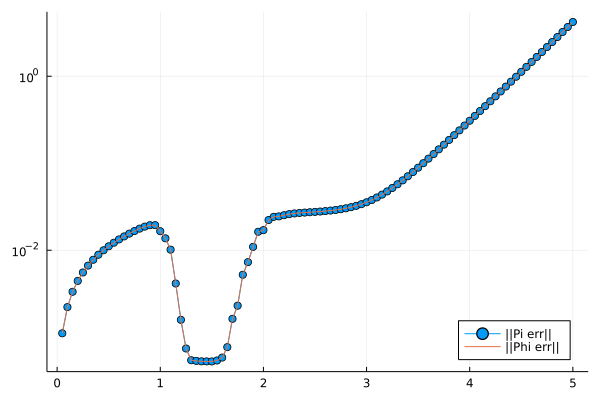

In [13]:
plot(sol[4],sol[5],yaxis=:log10,label="||Pi err||",legend=:bottomright,markershape=:circle)
plot!(sol[4],sol[6],label="||Phi err||")

┌ Info: Saved animation to 
│   fn = /Users/dwn8/.julia/dev/numex/src/compactFD/aPi.gif
└ @ Plots /Users/dwn8/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/dwn8/.julia/dev/numex/src/compactFD/aPi.gif")
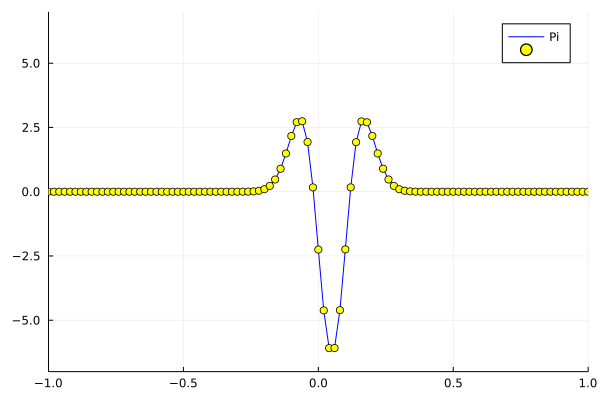

In [14]:
gif(sol[1], "aPi.gif")

┌ Info: Saved animation to 
│   fn = /Users/dwn8/.julia/dev/numex/src/compactFD/aPhi.gif
└ @ Plots /Users/dwn8/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/dwn8/.julia/dev/numex/src/compactFD/aPhi.gif")
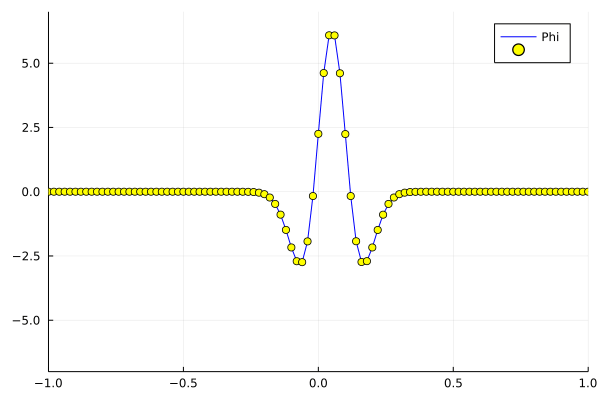

In [15]:
gif(sol[2], "aPhi.gif")

┌ Info: Saved animation to 
│   fn = /Users/dwn8/.julia/dev/numex/src/compactFD/ePi.gif
└ @ Plots /Users/dwn8/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/Users/dwn8/.julia/dev/numex/src/compactFD/ePi.gif")
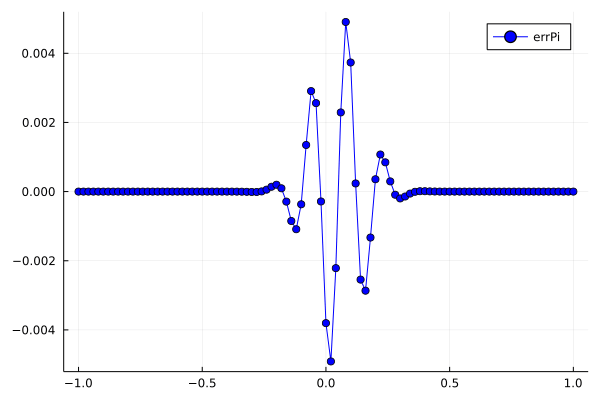

In [16]:
gif(sol[3],"ePi.gif")